# ön işleme ve veri görselleştirme

In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder


In [2]:

# veriseti okuma
file_path = "../veritoplama/processed_matches.csv"
df = pd.read_csv(file_path)

In [3]:
# önemli olmayan sütünleri kaldırmak
not_imp_col = ['match_year', 'team_A', 'score_A', 'score_B']
df = df.drop(columns=not_imp_col)


In [4]:
#boş olan sütünleri kaldırmak
df.dropna(inplace=True)

In [5]:
# boş olan sütünler kalmadığından emin olmak
df.isnull().sum()

team_B    0
result    0
dtype: int64

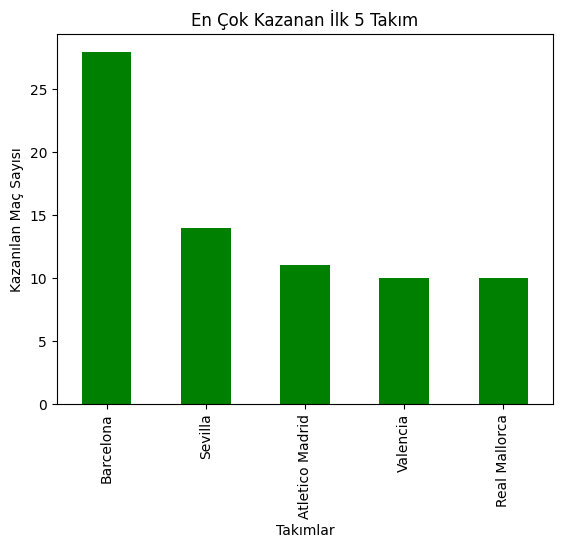

In [12]:
import matplotlib.pyplot as plt

# 'result' sütununda 'kazandı' olanları filtreleyip, kazanan takımları sayma
kazananlar = df[df['result'] == 0]['team_B'].value_counts()

# En çok kazanan ilk 5 takımın seçilmesi
en_cok_kazananlar = kazananlar.head(5)

# En çok kazanan takımların sayısını çubuk grafik olarak çizdirme
en_cok_kazananlar.plot(kind='bar', color='green')
plt.xlabel('Takımlar')
plt.ylabel('Kazanılan Maç Sayısı')
plt.title('En Çok Kazanan İlk 5 Takım')
plt.show()


**Sayısallaştırma**

In [6]:
# "team_B" sütununu Label Encoding yapma
label_encoder = LabelEncoder()
df['team_B_encoded'] = label_encoder.fit_transform(df['team_B'])
# encoding den sonra b takımların şekli
print(df['team_B_encoded'])


0         9
1       137
2         0
3       107
4        63
       ... 
1288    108
1289    110
1290    119
1291     23
1292     42
Name: team_B_encoded, Length: 1293, dtype: int32


# Eğtim

### kütüphaneleri import etme

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### değikenleri ayırma ve veriseti eğitim ve test için oluşturma

In [8]:

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df[['team_B_encoded']]
y = df['result']

# Eğitim ve test veri setlerini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)


### eğitim algoritmaları bir list'te yerleştirme

In [9]:

# algorithms tanıma
algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB()
]


### train ve predict ve test adımları başlatma

In [10]:

print("----RMSE----")
# Train and evaluate and test adımları gerçekleştirmek
for algorithm in algorithms:
    model = algorithm
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{algorithm.__class__.__name__} RMSE: {rmse}")


----RMSE----
LinearRegression RMSE: 0.5692587112484733
Ridge RMSE: 0.5692587114927085
Lasso RMSE: 0.5697080110865227
ElasticNet RMSE: 0.5697080110865227
DecisionTreeRegressor RMSE: 0.5821490015156677
RandomForestRegressor RMSE: 0.5744221409901755
GradientBoostingRegressor RMSE: 0.5640834328364998
SVR RMSE: 0.5659942628375894
KNeighborsRegressor RMSE: 0.6098293957262899
RandomForestClassifier RMSE: 0.6056363321295766
DecisionTreeClassifier RMSE: 0.6275527020278009
LogisticRegression RMSE: 0.5694947974514994
KNeighborsClassifier RMSE: 0.7246354428928556
SVC RMSE: 0.5694947974514994
GaussianNB RMSE: 0.5694947974514994


### modeli kayıd etme

Tüm algoritmaların aralarında yakın sonuçlar verdiği için, RandomForestClassifier algoritmasını tercih etmemin temel nedeni, predict_proba fonksiyonundan faydalanmaktır. Bu fonksiyon, sınıflandırma problemlerinde tahmin edilen sınıfların olasılıklarını sağlar. RandomForestClassifier'ın bu özelliği, modelin sınıflandırma gücünü daha ayrıntılı ve detaylı bir şekilde değerlendirmeme olanak tanır. Bu sayede, modelin sınıflandırma kararlarını daha iyi anlayabilir ve güvenilir tahminler elde edebilirim.

In [11]:
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

# Eğitilen modeli kayıdetmek
joblib.dump(model, './model.pkl')
print("RandomForestClassifier ile eğitilen model kaydedildi.")

RandomForestClassifier ile eğitilen model kaydedildi.
